In [2]:
# Dependencies

import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

#import json
#import requests

In [3]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [38]:
df = daily_price_historical('BTC', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() -df.timestamp.min()))


df_jan = df[df.timestamp>'20180101'][df.timestamp<'20180201']
df_jan.head()

Max length = 2821
Max time = 2820 days 00:00:00


C:\Users\erikr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,close,high,low,open,time,volumefrom,volumeto,timestamp
2726,14754.13,15306.13,12934.16,13444.88,1514851200,137732.17,1.956783e+09,2018-01-01 16:00:00
2727,15156.62,15435.01,14579.71,14754.09,1514937600,106543.39,1.604207e+09,2018-01-02 16:00:00
2728,15180.08,15408.66,14244.67,15156.49,1515024000,110968.82,1.656715e+09,2018-01-03 16:00:00
2729,16954.78,17126.95,14832.36,15180.08,1515110400,141960.42,2.283989e+09,2018-01-04 16:00:00
2730,17172.30,17252.85,16286.57,16954.76,1515196800,83927.99,1.412704e+09,2018-01-05 16:00:00


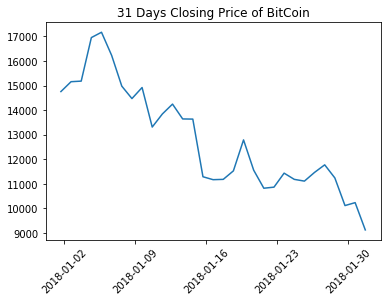

In [36]:
#plt.plot(df.timestamp, df.close)
plt.plot(df_jan.timestamp, df_jan.close)
plt.title("31 Days Closing Price of BitCoin")
plt.xticks(rotation=45)
plt.show()
plt.savefig('BTC_price_January.png')


In [ ]:
#make df for BTC major fluctuations
#identify fluctuations >10%, as heads up for twitter sentiment analysis
